In [ ]:
Linear regression과 Logistic regression의 차이는? (3가지 이상)
- Logistic regression
measure the relationship between the categorical dependent variable and
one or more independent variables
regression 의 경우 outlier가 나타났을 때 취약하다

Odds란? Odds ratio란?
- creditscore 와 approved 데이터
linear regression 으로 scatterplot of approve vs ficoscore를 나타내면
1은 우상단에 0은 좌하단에 위치해서 적절한 fit line을 찾기 힘들다


Odds ratio가 2라는 뜻은 어떤걸 나타내는가?
- the probability event divided by the probability of the event not happening so 
odds ratio for a 1 point increase in fico score : 3.337/3.289 = 1.0146
the change in the odds for a one unit increase in the independent variable 
so in this case we went from 720 to 721 

Probability와 Odds는 어떻게 다른가? 왜 해석에 주의해야하나?
Logit은 뭔가?

simple linear regression : one to one
multiple regression : many to one






In [1]:
install.packages('feather')
install.packages('pscl')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library(dplyr)
library(package = feather)
library(pscl)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Classes and Methods for R developed in the
Political Science Computational Laboratory
Department of Political Science
Stanford University
Simon Jackman
hurdle and zeroinfl functions by Achim Zeileis


In [5]:
df <- read_feather('merged_data.feather')

Warning message:
“Coercing int64 to double”Warning message:
“Coercing int64 to double”Warning message:
“Coercing int64 to double”Warning message:
“Coercing int64 to double”Warning message:
“Coercing int64 to double”Warning message:
“Coercing int64 to double”Warning message:
“Coercing int64 to double”Warning message:
“Coercing int64 to double”

In [6]:
head(df, 3)


AdoptionSpeed,Age,Description,Dewormed,Fee,FurLength,Gender,Health,MaturitySize,Name,⋯,Type,Vaccinated,VideoAmt,is_train,ColorName1,ColorName2,ColorName3,BreedName1,BreedName2,StateName
2,3,Nibble is a 3+ month old ball of cuteness. He is energetic and playful. I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled. The result was this little kitty. I do not have enough space and funds to care for more cats in my household. Looking for responsible people to take over Nibble's care.,No,100,1,Male,1,1,Nibble,⋯,Cat,No,0,TRUE,Black,White,NA,Tabby,NA,Selangor
0,1,I just found it alone yesterday near my apartment. It was shaking so I had to bring it home to provide temporary care.,Not Sure,0,2,Male,1,2,No Name Yet,⋯,Cat,Not Sure,0,TRUE,Black,Brown,NA,Domestic Medium Hair,NA,Kuala Lumpur
3,1,"Their pregnant mother was dumped by her irresponsible owner at the roadside near some shops in Subang Jaya. Gave birth to them at the roadside. They are all healthy and adorable puppies. Already dewormed, vaccinated and ready to go to a home. No tying or caging for long hours as guard dogs. However, it is acceptable to cage or tie for precautionary purposes. Interested to adopt pls call me.",Yes,0,2,Male,1,2,Brisco,⋯,Dog,Yes,0,TRUE,Brown,White,NA,Mixed Breed,NA,Selangor


In [7]:
df_trim = select(df, -Description, -PetID, -RescuerID, -Name)

In [8]:
head(df_trim)

AdoptionSpeed,Age,Dewormed,Fee,FurLength,Gender,Health,MaturitySize,PhotoAmt,Quantity,⋯,Type,Vaccinated,VideoAmt,is_train,ColorName1,ColorName2,ColorName3,BreedName1,BreedName2,StateName
2,3,No,100,1,Male,1,1,1,1,⋯,Cat,No,0,TRUE,Black,White,NA,Tabby,NA,Selangor
0,1,Not Sure,0,2,Male,1,2,2,1,⋯,Cat,Not Sure,0,TRUE,Black,Brown,NA,Domestic Medium Hair,NA,Kuala Lumpur
3,1,Yes,0,2,Male,1,2,7,1,⋯,Dog,Yes,0,TRUE,Brown,White,NA,Mixed Breed,NA,Selangor
2,4,Yes,150,1,Female,1,2,8,1,⋯,Dog,Yes,0,TRUE,Black,Brown,NA,Mixed Breed,NA,Kuala Lumpur
2,1,No,0,1,Male,1,2,3,1,⋯,Dog,No,0,TRUE,Black,NA,NA,Mixed Breed,NA,Selangor
2,3,No,0,1,Female,1,2,2,1,⋯,Cat,No,0,TRUE,Cream,Gray,NA,Domestic Short Hair,NA,Selangor


In [9]:
summary(df_trim)

 AdoptionSpeed         Age           Dewormed              Fee         
 Min.   :-1.000   Min.   :  0.00   Length:18941       Min.   :   0.00  
 1st Qu.: 1.000   1st Qu.:  2.00   Class :character   1st Qu.:   0.00  
 Median : 2.000   Median :  3.00   Mode  :character   Median :   0.00  
 Mean   : 1.783   Mean   : 10.68                      Mean   :  22.53  
 3rd Qu.: 3.000   3rd Qu.: 12.00                      3rd Qu.:   0.00  
 Max.   : 4.000   Max.   :255.00                      Max.   :3000.00  
   FurLength        Gender              Health       MaturitySize  
 Min.   :1.000   Length:18941       Min.   :1.000   Min.   :1.000  
 1st Qu.:1.000   Class :character   1st Qu.:1.000   1st Qu.:2.000  
 Median :1.000   Mode  :character   Median :1.000   Median :2.000  
 Mean   :1.467                      Mean   :1.038   Mean   :1.854  
 3rd Qu.:2.000                      3rd Qu.:1.000   3rd Qu.:2.000  
 Max.   :3.000                      Max.   :3.000   Max.   :4.000  
    PhotoAmt        

In [10]:
df_trim = filter(df_trim, is_train)

In [11]:
df_trim$Dewormed = as.factor(df_trim$Dewormed)
df_trim$Gender = as.factor(df_trim$Gender)
df_trim$Vaccinated = as.factor(df_trim$Vaccinated)
df_trim$Sterilized = as.factor(df_trim$Sterilized)
df_trim$Type = as.factor(df_trim$Type)
df_trim$VideoAmt = as.factor(df_trim$VideoAmt)
df_trim$ColorName1 = as.factor(df_trim$ColorName1)
df_trim$ColorName2 = as.factor(df_trim$ColorName2)
df_trim$ColorName3 = as.factor(df_trim$ColorName3)
df_trim$BreedName1 = as.factor(df_trim$BreedName1)
df_trim$BreedName2 = as.factor(df_trim$BreedName2)
df_trim$StateName = as.factor(df_trim$StateName)

In [12]:
summary(df_trim)

 AdoptionSpeed        Age             Dewormed         Fee         
 Min.   :0.000   Min.   :  0.00   No      :4815   Min.   :   0.00  
 1st Qu.:2.000   1st Qu.:  2.00   Not Sure:1781   1st Qu.:   0.00  
 Median :2.000   Median :  3.00   Yes     :8397   Median :   0.00  
 Mean   :2.516   Mean   : 10.45                   Mean   :  21.26  
 3rd Qu.:4.000   3rd Qu.: 12.00                   3rd Qu.:   0.00  
 Max.   :4.000   Max.   :255.00                   Max.   :3000.00  
                                                                   
   FurLength        Gender         Health       MaturitySize      PhotoAmt     
 Min.   :1.000   Female:7277   Min.   :1.000   Min.   :1.000   Min.   : 0.000  
 1st Qu.:1.000   Male  :5536   1st Qu.:1.000   1st Qu.:2.000   1st Qu.: 2.000  
 Median :1.000   Mixed :2180   Median :1.000   Median :2.000   Median : 3.000  
 Mean   :1.467                 Mean   :1.037   Mean   :1.862   Mean   : 3.889  
 3rd Qu.:2.000                 3rd Qu.:1.000   3rd Qu.:2

In [13]:
df_trim$Health <- ordered(df_trim$Health, levels = 1:3, labels= c("Good", "Soso", "Bad"))
df_trim$MaturitySize <- ordered(df_trim$MaturitySize, levels = 1:4,
                              labels = c("Small", "Medium", "Large", "Very large"))

In [ ]:
비록 우리는 최종적으로 0 ~ 4 (AdoptionSpeed)를 마춰야하지만 조금 더 쉽게 문제를 재정의하여 입양이 "빨리되는 펫"과 "느리게 되는 펫"을 먼저 구분하기로 합시다.
"입양이 빨리되는 펫": 0 ~ 2 / "입양이 느리게 되는 펫": 3 ~ 4로 구분합니다.

In [14]:
df_trim$AdoptionSpeed <- df_trim$AdoptionSpeed <= 2

In [15]:
head(df_trim$AdoptionSpeed)

[1]  TRUE  TRUE FALSE  TRUE  TRUE  TRUE

In [ ]:
Baseline 모델 제작

In [16]:
model1 <- glm(AdoptionSpeed ~ Age, family=binomial(link='logit'), data=df_trim)

In [17]:
summary(model1)


Call:
glm(formula = AdoptionSpeed ~ Age, family = binomial(link = "logit"), 
    data = df_trim)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.230  -1.211   1.126   1.139   1.878  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.1225498  0.0190830   6.422 1.35e-10 ***
Age         -0.0108817  0.0009809 -11.094  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 20784  on 14992  degrees of freedom
Residual deviance: 20651  on 14991  degrees of freedom
AIC: 20655

Number of Fisher Scoring iterations: 4


In [18]:
#estimated regression equation
exp(0.1225498 -0.0108817 * (1)) / (1 + exp(0.1225498 -0.0108817 * (1)))


[1] 0.5278881

In [19]:
head(df_trim)

AdoptionSpeed,Age,Dewormed,Fee,FurLength,Gender,Health,MaturitySize,PhotoAmt,Quantity,⋯,Type,Vaccinated,VideoAmt,is_train,ColorName1,ColorName2,ColorName3,BreedName1,BreedName2,StateName
TRUE,3,No,100,1,Male,Good,Small,1,1,⋯,Cat,No,0,TRUE,Black,White,NA,Tabby,NA,Selangor
TRUE,1,Not Sure,0,2,Male,Good,Medium,2,1,⋯,Cat,Not Sure,0,TRUE,Black,Brown,NA,Domestic Medium Hair,NA,Kuala Lumpur
FALSE,1,Yes,0,2,Male,Good,Medium,7,1,⋯,Dog,Yes,0,TRUE,Brown,White,NA,Mixed Breed,NA,Selangor
TRUE,4,Yes,150,1,Female,Good,Medium,8,1,⋯,Dog,Yes,0,TRUE,Black,Brown,NA,Mixed Breed,NA,Kuala Lumpur
TRUE,1,No,0,1,Male,Good,Medium,3,1,⋯,Dog,No,0,TRUE,Black,NA,NA,Mixed Breed,NA,Selangor
TRUE,3,No,0,1,Female,Good,Medium,2,1,⋯,Cat,No,0,TRUE,Cream,Gray,NA,Domestic Short Hair,NA,Selangor


In [20]:
model2 <- glm(AdoptionSpeed ~ Age + Health, family=binomial(link='logit'), data=df_trim)

In [21]:
summary(model2)


Call:
glm(formula = AdoptionSpeed ~ Age + Health, family = binomial(link = "logit"), 
    data = df_trim)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.232  -1.214   1.124   1.137   2.088  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.2291345  0.1352375  -1.694   0.0902 .  
Age         -0.0106509  0.0009852 -10.811   <2e-16 ***
Health.L    -0.6428424  0.2773851  -2.318   0.0205 *  
Health.Q    -0.2407235  0.1770902  -1.359   0.1740    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 20784  on 14992  degrees of freedom
Residual deviance: 20642  on 14989  degrees of freedom
AIC: 20650

Number of Fisher Scoring iterations: 4


In [22]:
model3 <- glm(AdoptionSpeed ~ BreedName1 + Type, family=binomial(link='logit'), data=df_trim)

In [23]:
summary(model3)


Call:
glm(formula = AdoptionSpeed ~ BreedName1 + Type, family = binomial(link = "logit"), 
    data = df_trim)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.03933  -1.07388   0.00097   1.13653   1.89302  

Coefficients: (1 not defined because of singularities)
                                                          Estimate Std. Error
(Intercept)                                              -0.143101   0.378932
BreedName1Affenpinscher                                 -14.422967 624.193942
BreedName1Airedale Terrier                              -14.422967 882.743456
BreedName1Akita                                           0.143101   1.464100
BreedName1American Bulldog                              -14.422967 882.743456
BreedName1American Curl                                   0.025318   0.616199
BreedName1American Shorthair                             -0.027525   0.431803
BreedName1American Staffordshire Terrier                -14.422967 509.652266
BreedN

In [24]:
model4 <- glm(AdoptionSpeed ~ Age + Gender + PhotoAmt + Sterilized +FurLength + BreedName1 + Type + StateName + Type:StateName,family=binomial(link='logit'),data=df_trim)


In [25]:
summary(model4)


Call:
glm(formula = AdoptionSpeed ~ Age + Gender + PhotoAmt + Sterilized + 
    FurLength + BreedName1 + Type + StateName + Type:StateName, 
    family = binomial(link = "logit"), data = df_trim)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.15648  -1.12795   0.00112   1.09034   2.44102  

Coefficients: (1 not defined because of singularities)
                                                          Estimate Std. Error
(Intercept)                                               0.063947   0.419255
Age                                                      -0.015047   0.001338
GenderMale                                                0.207013   0.038003
GenderMixed                                              -0.189355   0.052377
PhotoAmt                                                 -0.001533   0.005003
SterilizedNot Sure                                       -0.509522   0.055447
SterilizedYes                                            -0.802250   0.048343

In [26]:
nrow(df_trim)

[1] 14993

In [27]:
set.seed(123)

train_ind <-sample(seq_len(nrow(df_trim)), size = 14993*0.7)
train <- df_trim[train_ind, ]
test <- df_trim[-train_ind, ]

In [29]:
y <- test$AdoptionSpeed
X <- dplyr::select(test, -AdoptionSpeed)

In [30]:
model.final <- glm(AdoptionSpeed ~ Age + Gender + PhotoAmt + Sterilized +FurLength + Type + StateName,family=binomial(link='logit'),data=train)

In [31]:
y_pred = predict(model.final, X, type=c("response"))

In [34]:
prop.table(table(y_pred > 0.5, y))
# 0.2536683 + 0.3481547 = 0.59

       y
            FALSE      TRUE
  FALSE 0.2536683 0.1574033
  TRUE  0.2407737 0.3481547

In [35]:
install.packages('pROC')
library(pROC)


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



In [36]:
X$y_pred = y_pred

In [37]:
X$AdoptionSpeed = y

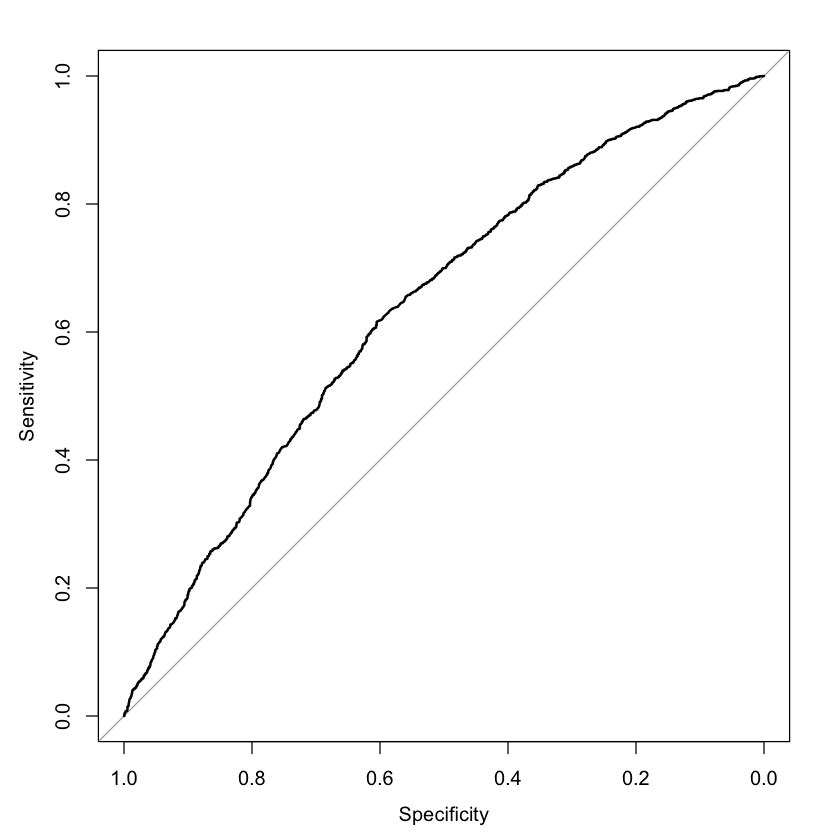

In [38]:
g <- roc(AdoptionSpeed ~ y_pred, data= X)
plot(g)